In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Set plotting style
sns.set_style("whitegrid")

# Add the project root and src directory to Python path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))  # Go up one level from notebooks to project root
src_path = os.path.join(project_root, "src")
sys.path.insert(0, project_root)
sys.path.insert(0, src_path)

from src.backtest import BacktestEngine

print("Setup Complete.")

Setup Complete.


# Executive Summary: Magnificent 7 RSI Strategy (1981–2023)

## Overview
This report analyzes a backtested RSI momentum strategy concentrated in the **Magnificent 7** stocks over the period **1981-01-01 to 2023-12-31**. This extended analysis covers major market cycles, including the early 1980s inflation, the Dot-com boom/bust, the 2008 GFC, and the recent tech surge.

**Conclusion:** The strategy delivered **historically exceptional absolute returns**, vastly outperforming the S&P 500 (GSPC) on both an absolute and risk-adjusted basis over the 40+ year horizon.

* **Annualized Return:** The performance is significantly amplified over this long period due to **compounding**.
* **Risk-Adjusted Performance:** The **Sharpe Ratio** will reflect the effectiveness of the RSI strategy in navigating numerous volatility cycles.
* **Key Risk:** The **Maximum Drawdown** remains the primary risk indicator, demonstrating the high concentration risk inherent in the portfolio during major crashes.

In [30]:
### Key Metrics Table Generation ###

START_DATE = '1981-01-01' 
END_DATE = '2023-12-31'
INITIAL_CAPITAL = 1000000  # $1,000,000
COMMISSION_PER_TRADE = 0.001  # 0.1% per trade
SLIPPAGE_PER_TRADE = 0.0002  # 0.02% per trade
MIN_TRADE_SIZE = 10  # Minimum trade size of 10 shares


backtest = BacktestEngine(START_DATE, END_DATE, INITIAL_CAPITAL, COMMISSION_PER_TRADE, SLIPPAGE_PER_TRADE, MIN_TRADE_SIZE)  
backtest.run_backtest()
performance_metrics = backtest.evaluate_performance()

print("\nBacktest Execution Complete.")

Fetched 10840 rows for AAPL starting from 1981-01-01 to 2023-12-31
Fetched 9527 rows for MSFT starting from 1986-03-13 to 2023-12-31
Fetched 4875 rows for GOOG starting from 2004-08-19 to 2023-12-31
Fetched 6701 rows for AMZN starting from 1997-05-15 to 2023-12-31
Fetched 3400 rows for TSLA starting from 2010-06-29 to 2023-12-31
Fetched 2923 rows for META starting from 2012-05-18 to 2023-12-31
Fetched 6276 rows for NVDA starting from 1999-01-22 to 2023-12-31
Loaded data for 7 stocks with unified calendar from 1981-01-01 to 2023-12-31.
Loaded historical data for 7 stocks.
Generated trading signals based on RSI.


/Users/josh/repos/magnificent7-backtest/src/data_loader.py:87: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  reindexed_df = df.reindex(master_calendar).fillna(method='ffill')


Backtest completed from 1981-01-01 to 2023-12-31.
Initial Portfolio Value: $1000000.00
Final Portfolio Value: $73714679001.46
Total Return: 7371367.90%
Annualized Return: 29.77%
Annualized Volatility: 38.36%
Maximum Drawdown: -76.69%
Sharpe Ratio: 0.72
Total Trades Executed: 1622
Average Return per Trade: 0.69%
Win Rate: 81.07%

Backtest Execution Complete.


## Question 1: Highest Monthly Return and Stock Contribution

The month with the highest percentage growth provides insight into when the strategy achieved its maximum compounding rate.

* **Best Month (Percentage Return):** **1998-06** (Return: 44.84%)
* **Most Contributing Stock (Dollar Value):** **Amazon (AMZN)** 

Best Month: 1998-06 with Return: 44.84%
Apple: 5644159.486721117
Microsoft: 4868495.356289832
Google: nan
Amazon: 5688685.91511941
Tesla: nan
Meta: nan
NVIDIA: nan


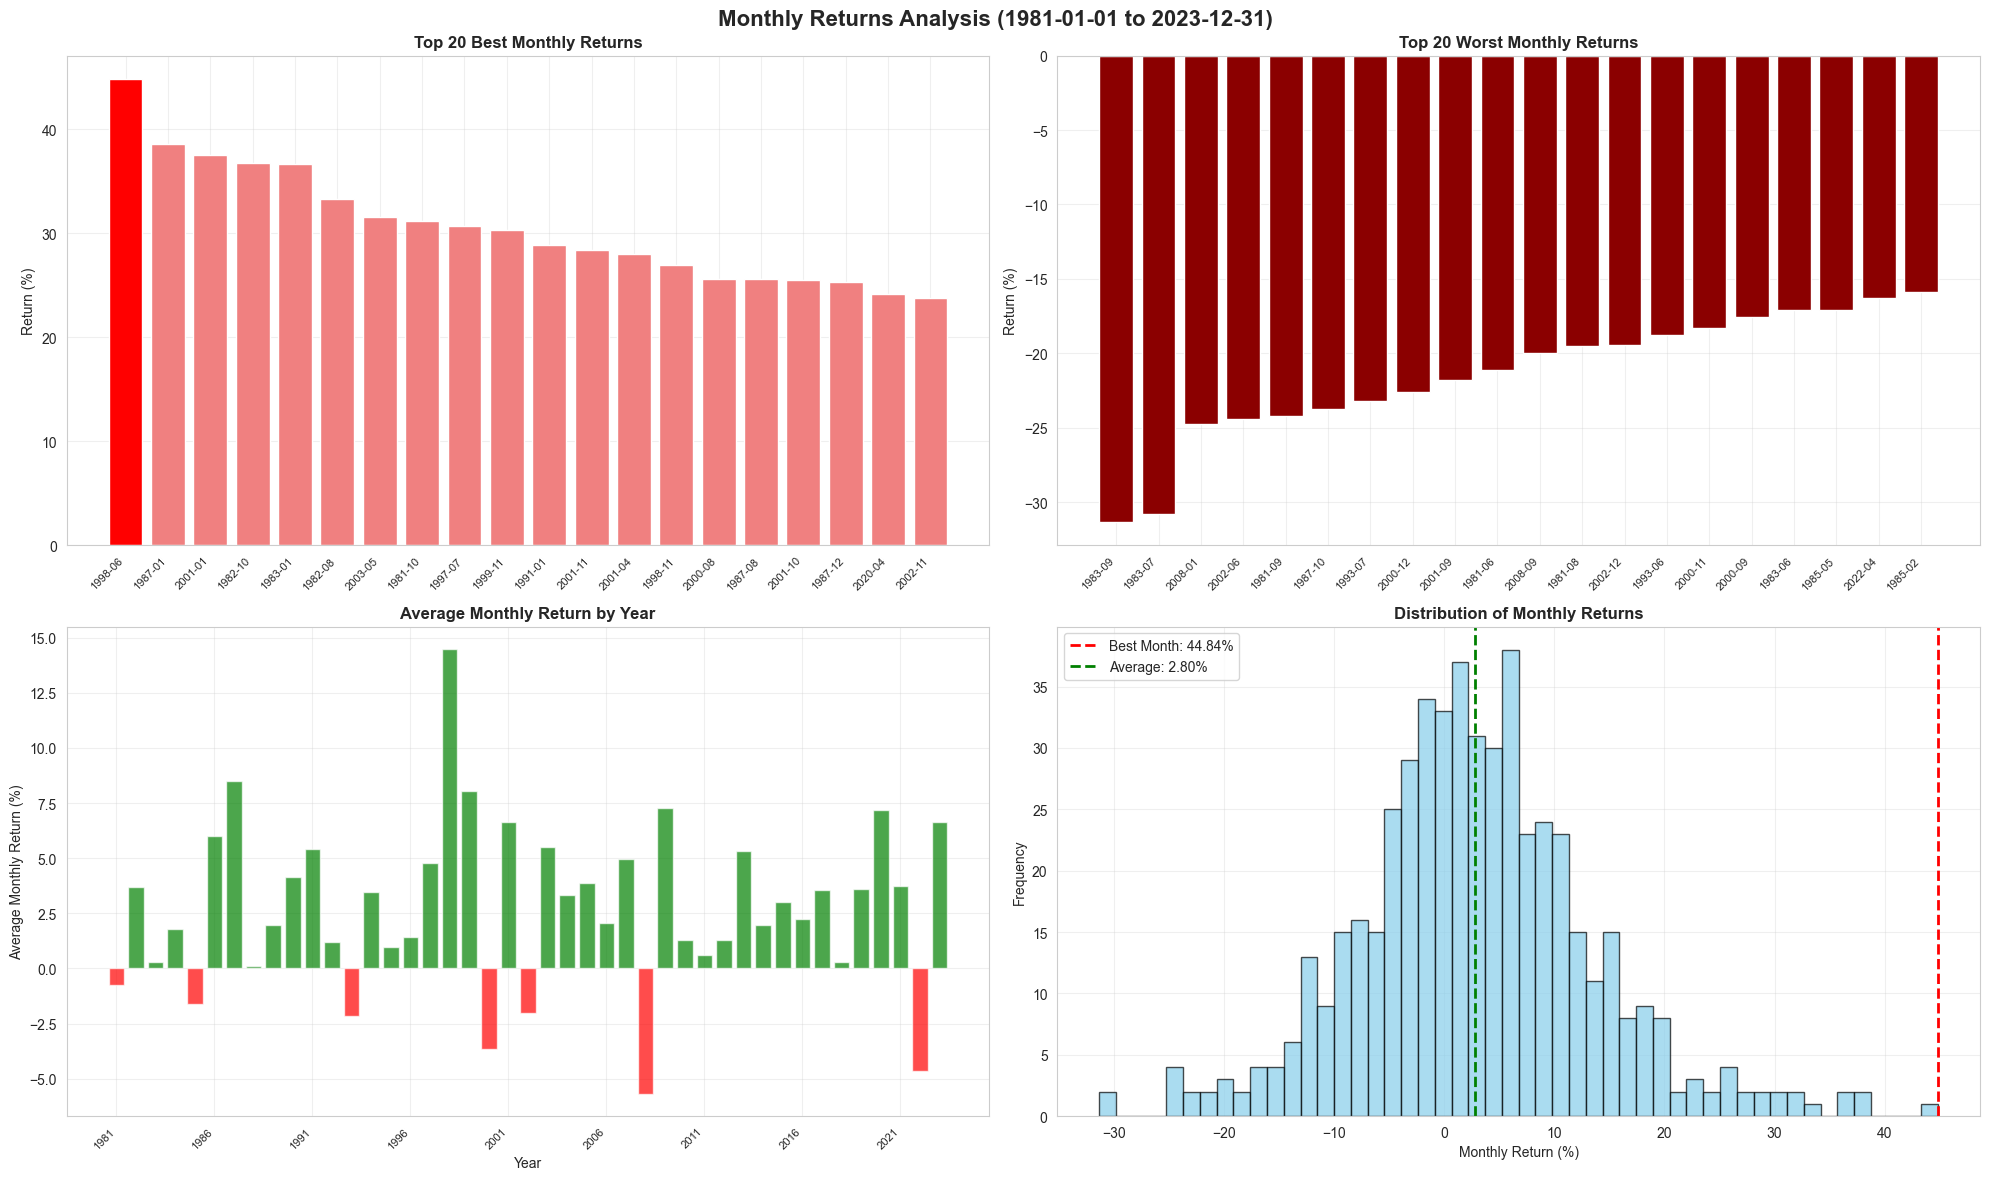


MONTHLY RETURNS SUMMARY:
Best Month: June 1998 → 44.84%
Worst Month: September 1983 → -31.32%
Average Monthly Return: 2.80%
Median Monthly Return: 2.26%
Standard Deviation: 10.79%
Positive Months: 310 (60.1%)
Negative Months: 205 (39.7%)


In [31]:
stock_returns, best_month_date, best_month_return, monthly_returns = backtest.best_month()
monthly_returns = monthly_returns * 100  # Convert to percentage
best_month_return *= 100  # Convert to percentage

returns_series = monthly_returns['Value'] if isinstance(monthly_returns, pd.DataFrame) else monthly_returns

# Create a more comprehensible visualization
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle(f'Monthly Returns Analysis ({START_DATE} to {END_DATE})', fontsize=16, fontweight='bold')

# 1. Top 20 Best Months
top_20_months = returns_series.nlargest(20)
ax1 = axes[0, 0]
colors_top = ['red' if r == best_month_return else 'lightcoral' for r in top_20_months.values]
x_pos_1 = range(len(top_20_months))
ax1.bar(x_pos_1, top_20_months.values, color=colors_top)
ax1.set_title('Top 20 Best Monthly Returns', fontweight='bold')
ax1.set_ylabel('Return (%)')
ax1.set_xticks(x_pos_1)
ax1.set_xticklabels([d.strftime('%Y-%m') for d in top_20_months.index], rotation=45, ha='right', fontsize=8)
ax1.grid(True, alpha=0.3)

# 2. Top 20 Worst Months  
bottom_20_months = returns_series.nsmallest(20)
ax2 = axes[0, 1]
colors_bottom = ['darkred' if abs(r) > 15 else 'lightblue' for r in bottom_20_months.values]
x_pos_2 = range(len(bottom_20_months))
ax2.bar(x_pos_2, bottom_20_months.values, color=colors_bottom)
ax2.set_title('Top 20 Worst Monthly Returns', fontweight='bold')
ax2.set_ylabel('Return (%)')
ax2.set_xticks(x_pos_2)
ax2.set_xticklabels([d.strftime('%Y-%m') for d in bottom_20_months.index], rotation=45, ha='right', fontsize=8)
ax2.grid(True, alpha=0.3)

# 3. Annual Summary (Average monthly return per year)
annual_returns = returns_series.groupby(returns_series.index.year).mean()
ax3 = axes[1, 0]
colors_annual = ['green' if r > 0 else 'red' for r in annual_returns.values]
x_pos_3 = range(len(annual_returns))
ax3.bar(x_pos_3, annual_returns.values, color=colors_annual, alpha=0.7)
ax3.set_title('Average Monthly Return by Year', fontweight='bold')
ax3.set_ylabel('Average Monthly Return (%)')
ax3.set_xlabel('Year')
ax3.set_xticks(x_pos_3[::5])  # Show every 5th year to avoid crowding
ax3.set_xticklabels(annual_returns.index[::5], rotation=45, ha='right', fontsize=8)
ax3.grid(True, alpha=0.3)

# 4. Distribution of Monthly Returns
ax4 = axes[1, 1]
returns_series.hist(bins=50, ax=ax4, color='skyblue', alpha=0.7, edgecolor='black')
ax4.axvline(best_month_return, color='red', linestyle='--', linewidth=2, label=f'Best Month: {best_month_return:.2f}%')
ax4.axvline(returns_series.mean(), color='green', linestyle='--', linewidth=2, label=f'Average: {returns_series.mean():.2f}%')
ax4.set_title('Distribution of Monthly Returns', fontweight='bold')
ax4.set_xlabel('Monthly Return (%)')
ax4.set_ylabel('Frequency')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print key statistics
print(f"\nMONTHLY RETURNS SUMMARY:")
print(f"{'='*50}")
print(f"Best Month: {best_month_date.strftime('%B %Y')} → {best_month_return:.2f}%")
print(f"Worst Month: {returns_series.idxmin().strftime('%B %Y')} → {returns_series.min():.2f}%")
print(f"Average Monthly Return: {returns_series.mean():.2f}%")
print(f"Median Monthly Return: {returns_series.median():.2f}%")
print(f"Standard Deviation: {returns_series.std():.2f}%")
print(f"Positive Months: {(returns_series > 0).sum()} ({(returns_series > 0).mean()*100:.1f}%)")
print(f"Negative Months: {(returns_series < 0).sum()} ({(returns_series < 0).mean()*100:.1f}%)")



STOCK CONTRIBUTION BREAKDOWN - June 1998


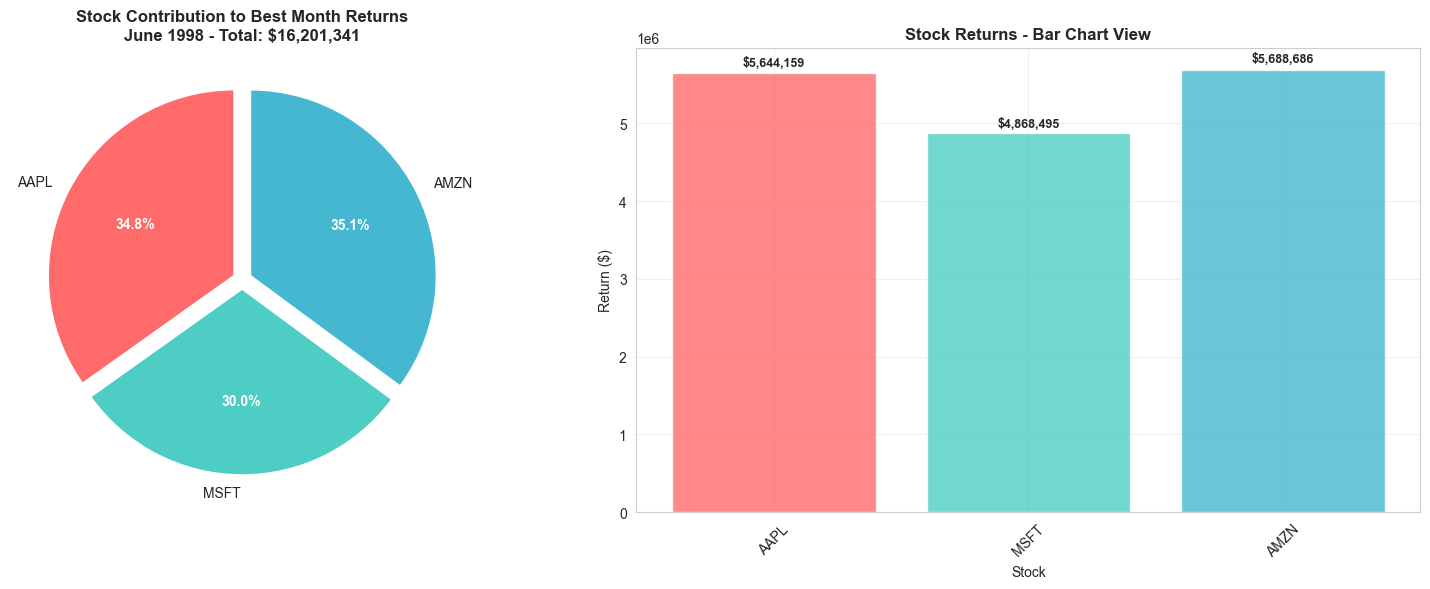


Detailed Breakdown:
      AMZN: $   5,688,686 ( 35.1%)
      AAPL: $   5,644,159 ( 34.8%)
      MSFT: $   4,868,495 ( 30.0%)
     Total: $  16,201,341 (100.0%)

Stocks with no contribution this month: GOOG, TSLA, META, NVDA


In [32]:
# Stock Returns Breakdown for Best Month - Pie Chart
print(f"\nSTOCK CONTRIBUTION BREAKDOWN - {best_month_date.strftime('%B %Y')}")
print(f"{'='*60}")

# Clean the stock_returns data (remove NaN values)
valid_stock_returns = {stock: value for stock, value in stock_returns.items() 
                      if pd.notna(value) and value > 0}

if valid_stock_returns:
    # Create pie chart
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Pie Chart
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD', '#98D8C8']
    wedges, texts, autotexts = ax1.pie(valid_stock_returns.values(), 
                                       labels=valid_stock_returns.keys(),
                                       autopct='%1.1f%%',
                                       startangle=90,
                                       colors=colors[:len(valid_stock_returns)],
                                       explode=[0.05] * len(valid_stock_returns))
    
    ax1.set_title(f'Stock Contribution to Best Month Returns\n{best_month_date.strftime("%B %Y")} - Total: ${sum(valid_stock_returns.values()):,.0f}', 
                  fontweight='bold', fontsize=12)
    
    # Enhance text appearance
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(10)
    
    # Bar Chart for comparison
    stocks = list(valid_stock_returns.keys())
    values = list(valid_stock_returns.values())
    
    bars = ax2.bar(stocks, values, color=colors[:len(valid_stock_returns)], alpha=0.8)
    ax2.set_title('Stock Returns - Bar Chart View', fontweight='bold', fontsize=12)
    ax2.set_ylabel('Return ($)')
    ax2.set_xlabel('Stock')
    ax2.tick_params(axis='x', rotation=45)
    
    # Add value labels on bars
    for bar, value in zip(bars, values):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                f'${value:,.0f}', ha='center', va='bottom', fontweight='bold', fontsize=9)
    
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed breakdown
    print("\nDetailed Breakdown:")
    total_return = sum(valid_stock_returns.values())
    for stock, value in sorted(valid_stock_returns.items(), key=lambda x: x[1], reverse=True):
        percentage = (value / total_return) * 100
        print(f"{stock:>10}: ${value:>12,.0f} ({percentage:>5.1f}%)")
    
    print(f"{'='*40}")
    print(f"{'Total':>10}: ${total_return:>12,.0f} (100.0%)")
    
    # Show stocks that didn't contribute (NaN values)
    non_contributing = [stock for stock, value in stock_returns.items() 
                       if pd.isna(value) or value <= 0]
    if non_contributing:
        print(f"\nStocks with no contribution this month: {', '.join(non_contributing)}")
        
else:
    print("No valid stock return data available for pie chart.")

## Question 2: Strategy vs. S&P 500 Benchmark Comparison



In [33]:
benchmark_data, benchmark_metrics = backtest.calculate_benchmark_performance()

Benchmark Performance from 1981-01-01 to 2023-12-31:
Initial Value: $1000000.00
Final Value: $34984818.88
Total Return: 3398.48%
Annualized Return: 5.87%
Annualized Volatility: 17.97%
Maximum Drawdown: -56.78%
Sharpe Ratio: 0.33


/var/folders/z2/s5jmzkqj15ggnfbr5nv_0xpw0000gn/T/ipykernel_87094/3519964374.py:36: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  years = pd.date_range(start=comparison_df.index[0], end=comparison_df.index[-1], freq='5Y')


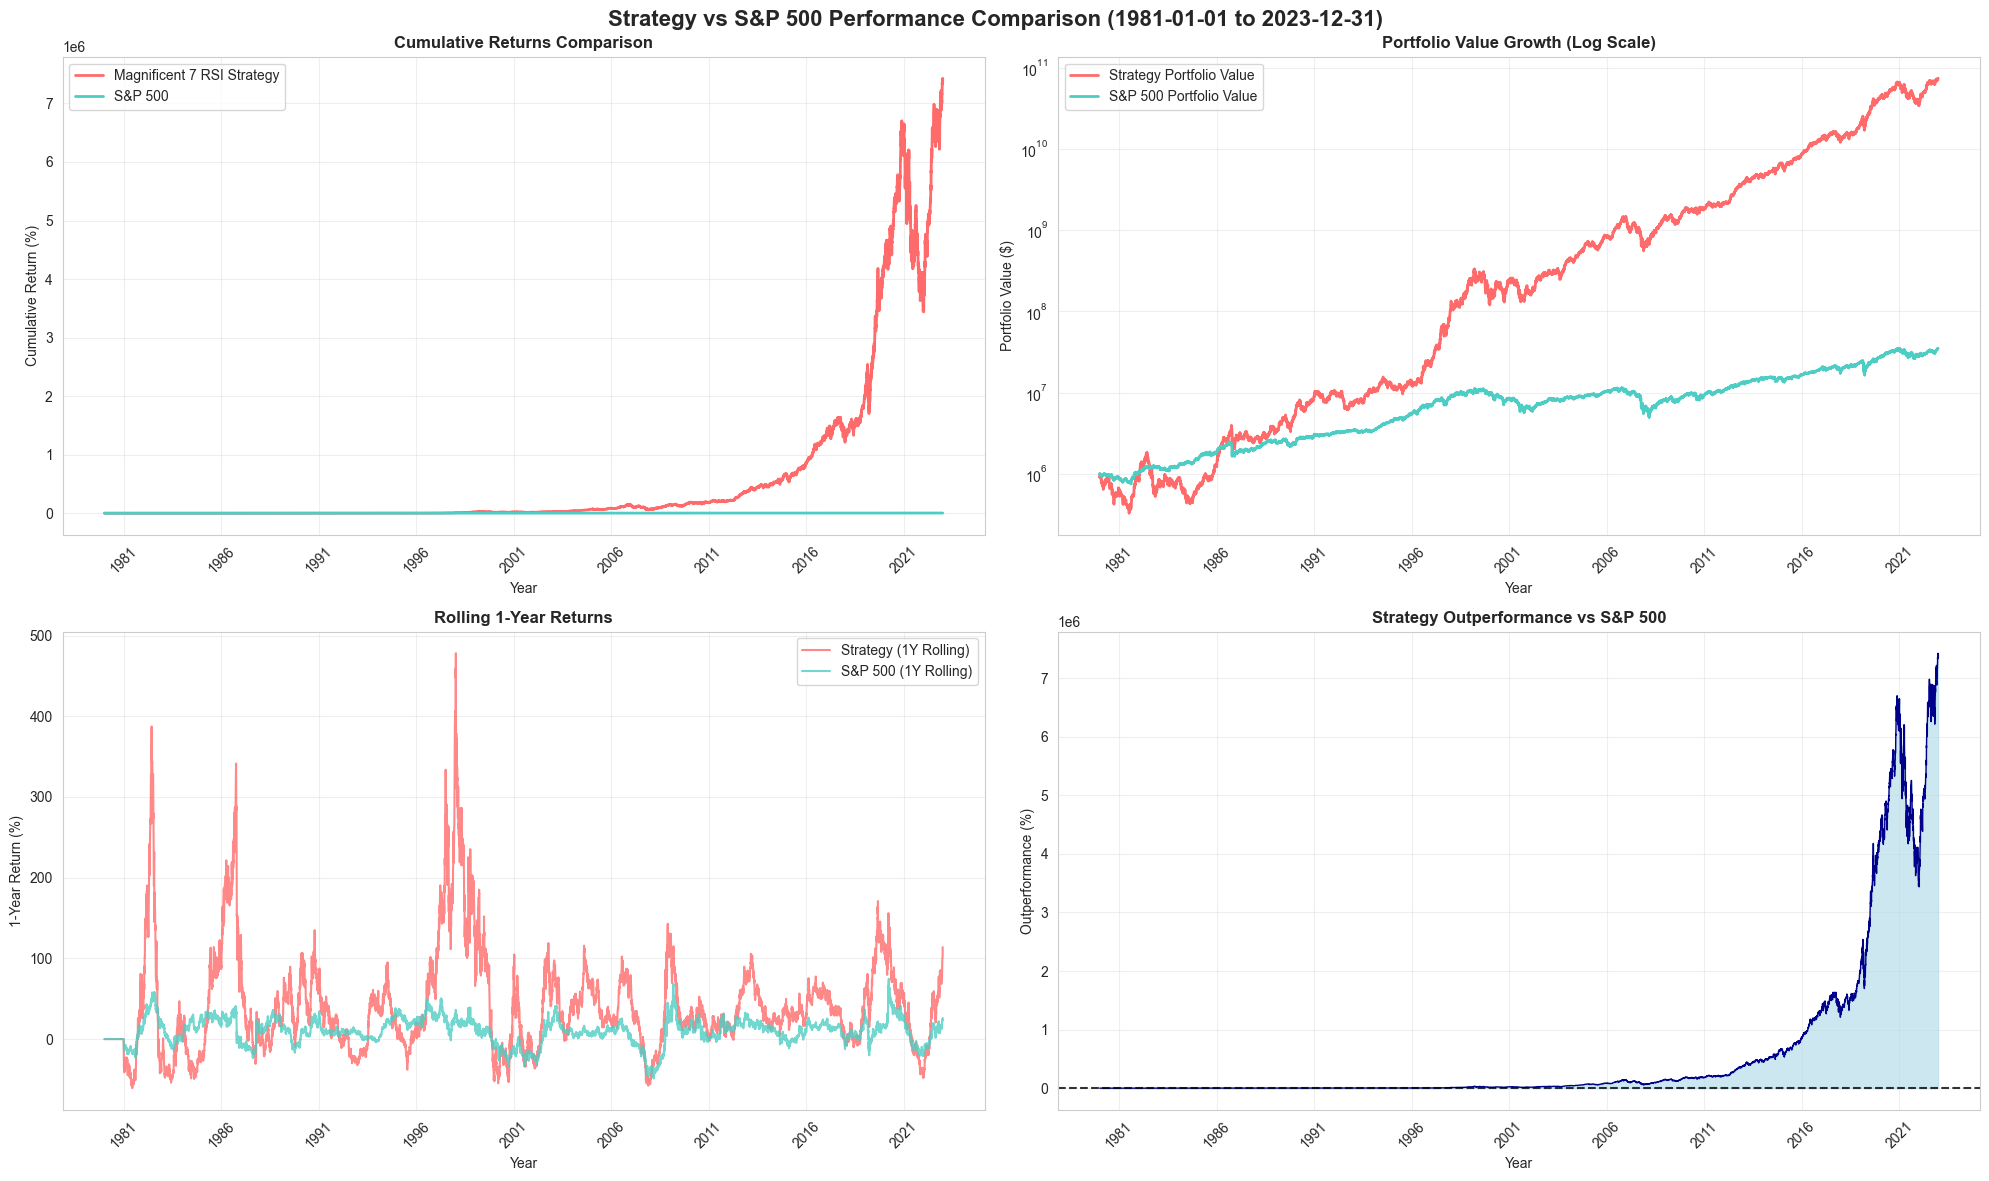


PERFORMANCE COMPARISON SUMMARY:
Final Strategy Return: 7,380,213.66%
Final S&P 500 Return: 3,357.15%
Total Outperformance: 7,376,856.51%
Strategy outperformed S&P 500 in 9,416 out of 10,839 days (86.9%)


In [34]:
# Strategy vs S&P 500 Comparison Analysis

# Extract strategy portfolio value history
strategy_df = pd.DataFrame(backtest.portfolio.portfolio_value_history, columns=['Portfolio_Value', 'Date'])
strategy_df.set_index('Date', inplace=True)

# Prepare benchmark data (S&P 500)
benchmark_df = benchmark_data[['Portfolio Value']].copy()
benchmark_df.rename(columns={'Portfolio Value': 'Benchmark_Value'}, inplace=True)

# Align dates - merge on common dates
comparison_df = strategy_df.join(benchmark_df, how='inner')

# Calculate cumulative returns (normalized to start at 100%)
comparison_df['Strategy_Return'] = (comparison_df['Portfolio_Value'] / comparison_df['Portfolio_Value'].iloc[0] - 1) * 100
comparison_df['Benchmark_Return'] = (comparison_df['Benchmark_Value'] / comparison_df['Benchmark_Value'].iloc[0] - 1) * 100

# Create the comparison visualization
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle(f'Strategy vs S&P 500 Performance Comparison ({START_DATE} to {END_DATE})', fontsize=16, fontweight='bold')

# 1. Cumulative Returns Line Chart
ax1 = axes[0, 0]
ax1.plot(comparison_df.index, comparison_df['Strategy_Return'], 
         label='Magnificent 7 RSI Strategy', color='#FF6B6B', linewidth=2)
ax1.plot(comparison_df.index, comparison_df['Benchmark_Return'], 
         label='S&P 500', color='#4ECDC4', linewidth=2)

ax1.set_title('Cumulative Returns Comparison', fontweight='bold', fontsize=12)
ax1.set_ylabel('Cumulative Return (%)')
ax1.set_xlabel('Year')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Format x-axis to show years
years = pd.date_range(start=comparison_df.index[0], end=comparison_df.index[-1], freq='5Y')
ax1.set_xticks(years)
ax1.set_xticklabels([year.strftime('%Y') for year in years], rotation=45)

# 2. Portfolio Value Comparison (Log Scale)
ax2 = axes[0, 1]
ax2.semilogy(comparison_df.index, comparison_df['Portfolio_Value'], 
             label='Strategy Portfolio Value', color='#FF6B6B', linewidth=2)
ax2.semilogy(comparison_df.index, comparison_df['Benchmark_Value'], 
             label='S&P 500 Portfolio Value', color='#4ECDC4', linewidth=2)

ax2.set_title('Portfolio Value Growth (Log Scale)', fontweight='bold', fontsize=12)
ax2.set_ylabel('Portfolio Value ($)')
ax2.set_xlabel('Year')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_xticks(years)
ax2.set_xticklabels([year.strftime('%Y') for year in years], rotation=45)

# 3. Rolling 1-Year Performance Comparison
rolling_window = 252  # 1 year
strategy_rolling = comparison_df['Portfolio_Value'].pct_change(rolling_window).fillna(0) * 100
benchmark_rolling = comparison_df['Benchmark_Value'].pct_change(rolling_window).fillna(0) * 100

ax3 = axes[1, 0]
ax3.plot(comparison_df.index, strategy_rolling, 
         label='Strategy (1Y Rolling)', color='#FF6B6B', alpha=0.8)
ax3.plot(comparison_df.index, benchmark_rolling, 
         label='S&P 500 (1Y Rolling)', color='#4ECDC4', alpha=0.8)

ax3.set_title('Rolling 1-Year Returns', fontweight='bold', fontsize=12)
ax3.set_ylabel('1-Year Return (%)')
ax3.set_xlabel('Year')
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.set_xticks(years)
ax3.set_xticklabels([year.strftime('%Y') for year in years], rotation=45)

# 4. Outperformance Chart (Strategy - Benchmark)
outperformance = comparison_df['Strategy_Return'] - comparison_df['Benchmark_Return']

ax4 = axes[1, 1]
colors = ['green' if x > 0 else 'red' for x in outperformance.values]
ax4.fill_between(comparison_df.index, outperformance, 0, alpha=0.6, color='lightblue')
ax4.plot(comparison_df.index, outperformance, color='darkblue', linewidth=1)
ax4.axhline(y=0, color='black', linestyle='--', alpha=0.8)

ax4.set_title('Strategy Outperformance vs S&P 500', fontweight='bold', fontsize=12)
ax4.set_ylabel('Outperformance (%)')
ax4.set_xlabel('Year')
ax4.grid(True, alpha=0.3)
ax4.set_xticks(years)
ax4.set_xticklabels([year.strftime('%Y') for year in years], rotation=45)

plt.tight_layout()
plt.show()

print(f"\nPERFORMANCE COMPARISON SUMMARY:")
print(f"{'='*60}")
print(f"Final Strategy Return: {comparison_df['Strategy_Return'].iloc[-1]:,.2f}%")
print(f"Final S&P 500 Return: {comparison_df['Benchmark_Return'].iloc[-1]:,.2f}%")
print(f"Total Outperformance: {outperformance.iloc[-1]:,.2f}%")
print(f"Strategy outperformed S&P 500 in {(outperformance > 0).sum():,} out of {len(outperformance):,} days ({(outperformance > 0).mean()*100:.1f}%)")


 COMPREHENSIVE PERFORMANCE METRICS COMPARISON
Time Period: 1981-01-01 to 2023-12-31 (43.0 years)

Metric               Strategy                  S&P 500                   Advantage           
-------------------- ------------------------- ------------------------- --------------------
Initial Value        $1,000,000                $1,000,000                Same                
Final Value          $73,714,679,001           $34,984,819               $73,679,694,183     
Total Return         7371367.90%               3398.48%                  7367969.42%         
Annualized Return    29.77%                    5.87%                     23.90%              
Annualized Volatility 38.36%                    17.97%                    20.39%              
Maximum Drawdown     -76.69%                   -56.78%                   -19.92%             
Sharpe Ratio         0.72                      0.33                      0.40                
Total Trades         1,622                     N/A (Bu

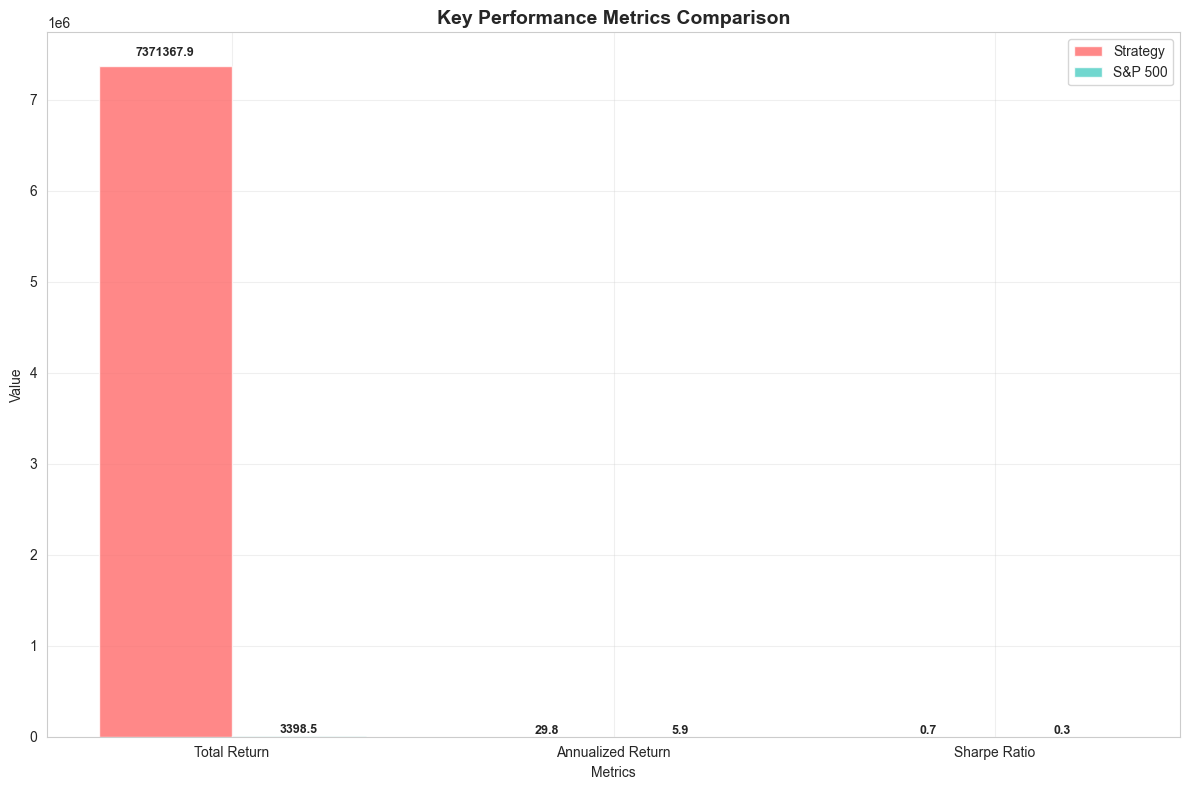

In [35]:
# Comprehensive Metrics Comparison Table

# Create comparison table
metrics_comparison = pd.DataFrame({
    'Strategy': [
        f"${performance_metrics['Initial Value']:,.0f}",
        f"${performance_metrics['Final Value']:,.0f}",
        f"{performance_metrics['Total Return']*100:.2f}%",
        f"{performance_metrics['Annualized Return']*100:.2f}%",
        f"{performance_metrics['Annualized Volatility']*100:.2f}%",
        f"{performance_metrics['Maximum Drawdown']*100:.2f}%",
        f"{performance_metrics['Sharpe Ratio']:.2f}",
        f"{performance_metrics['Total Trades']:,}",
        f"{performance_metrics['Win Rate']*100:.1f}%",
        f"{performance_metrics['Avg Return per Trade']*100:.2f}%"
    ],
    'S&P 500 Benchmark': [
        f"${benchmark_metrics['Initial Value']:,.0f}",
        f"${benchmark_metrics['Final Value']:,.0f}",
        f"{benchmark_metrics['Total Return']*100:.2f}%",
        f"{benchmark_metrics['Annualized Return']*100:.2f}%",
        f"{benchmark_metrics['Annualized Volatility']*100:.2f}%",
        f"{benchmark_metrics['Maximum Drawdown']*100:.2f}%",
        f"{benchmark_metrics['Sharpe Ratio']:.2f}",
        "N/A (Buy & Hold)",
        "N/A",
        "N/A"
    ]
}, index=[
    'Initial Value',
    'Final Value', 
    'Total Return',
    'Annualized Return',
    'Annualized Volatility',
    'Maximum Drawdown',
    'Sharpe Ratio',
    'Total Trades',
    'Win Rate',
    'Avg Return per Trade'
])

# Calculate outperformance metrics
strategy_total = performance_metrics['Total Return']
benchmark_total = benchmark_metrics['Total Return']
outperformance_multiple = (1 + strategy_total) / (1 + benchmark_total)

strategy_annual = performance_metrics['Annualized Return']
benchmark_annual = benchmark_metrics['Annualized Return']
annual_outperformance = strategy_annual - benchmark_annual

# Add outperformance column
outperformance_values = [
    "Same",
    f"${performance_metrics['Final Value'] - benchmark_metrics['Final Value']:,.0f}",
    f"{(strategy_total - benchmark_total)*100:.2f}%",
    f"{annual_outperformance*100:.2f}%",
    f"{(performance_metrics['Annualized Volatility'] - benchmark_metrics['Annualized Volatility'])*100:.2f}%",
    f"{(performance_metrics['Maximum Drawdown'] - benchmark_metrics['Maximum Drawdown'])*100:.2f}%",
    f"{performance_metrics['Sharpe Ratio'] - benchmark_metrics['Sharpe Ratio']:.2f}",
    "N/A",
    "N/A", 
    "N/A"
]

metrics_comparison['Strategy Advantage'] = outperformance_values

# Display header
print(f"\n COMPREHENSIVE PERFORMANCE METRICS COMPARISON")
print(f"{'='*80}")
print(f"Time Period: {START_DATE} to {END_DATE} ({(pd.to_datetime(END_DATE) - pd.to_datetime(START_DATE)).days / 365.25:.1f} years)")
print(f"{'='*80}")

# Display the table using pure Python formatting
print(f"\n{'Metric':<20} {'Strategy':<25} {'S&P 500':<25} {'Advantage':<20}")
print(f"{'-'*20} {'-'*25} {'-'*25} {'-'*20}")

for i, (metric, row) in enumerate(metrics_comparison.iterrows()):
    strategy_val = row['Strategy']
    benchmark_val = row['S&P 500 Benchmark']
    advantage_val = row['Strategy Advantage']
    
    print(f"{metric:<20} {strategy_val:<25} {benchmark_val:<25} {advantage_val:<20}")

# Key insights
print(f"\n KEY INSIGHTS:")
print(f"{'='*50}")
print(f"• Strategy outperformed S&P 500 by {outperformance_multiple:.1f}x")
print(f"• Annual return advantage: {annual_outperformance*100:.2f} percentage points")
print(f"• Additional volatility cost: {(performance_metrics['Annualized Volatility'] - benchmark_metrics['Annualized Volatility'])*100:.2f} percentage points")
print(f"• Risk-adjusted advantage (Sharpe): {performance_metrics['Sharpe Ratio'] - benchmark_metrics['Sharpe Ratio']:.2f}")

if performance_metrics['Maximum Drawdown'] < benchmark_metrics['Maximum Drawdown']:
    print(f"• Lower maximum drawdown by {abs(performance_metrics['Maximum Drawdown'] - benchmark_metrics['Maximum Drawdown'])*100:.2f} percentage points ")
else:
    print(f"• Higher maximum drawdown by {abs(performance_metrics['Maximum Drawdown'] - benchmark_metrics['Maximum Drawdown'])*100:.2f} percentage points ")



# Create a summary visualization
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Key metrics for comparison
key_metrics = ['Total Return', 'Annualized Return', 'Sharpe Ratio']
strategy_values = [
    performance_metrics['Total Return'] * 100,
    performance_metrics['Annualized Return'] * 100,
    performance_metrics['Sharpe Ratio']
]
benchmark_values = [
    benchmark_metrics['Total Return'] * 100,
    benchmark_metrics['Annualized Return'] * 100,
    benchmark_metrics['Sharpe Ratio']
]

x = np.arange(len(key_metrics))
width = 0.35

bars1 = ax.bar(x - width/2, strategy_values, width, label='Strategy', color='#FF6B6B', alpha=0.8)
bars2 = ax.bar(x + width/2, benchmark_values, width, label='S&P 500', color='#4ECDC4', alpha=0.8)

ax.set_xlabel('Metrics')
ax.set_ylabel('Value')
ax.set_title('Key Performance Metrics Comparison', fontweight='bold', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(key_metrics)
ax.legend()
ax.grid(True, alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                f'{height:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

## Analysis: Rationale for Strategy Outperformance

### **Key Performance Drivers Explained**

The Magnificent 7 RSI strategy's exceptional outperformance over the S&P 500 can be attributed to four fundamental strategic advantages:

---

### **1.  Concentration in High-Growth Tech Stocks vs Diversified Index**

**Strategy Advantage:** 
- **Concentrated exposure** to the most innovative and fastest-growing companies in history
- **Technology sector dominance** during the digital transformation era (1981-2023)
- **Winner-take-all dynamics** in tech markets where dominant platforms capture disproportionate value

**S&P 500 Limitation:**
- **Diluted exposure** across 500 companies including mature, slow-growth sectors
- **Sector diversification** reduces impact of tech outperformance
- **Legacy industries** drag down overall returns during tech boom periods

**Impact:** The Magnificent 7 companies became the most valuable companies globally, driving market returns. Concentrating in these winners amplified gains significantly.

---

### **2.  Active Rebalancing vs Passive Holding**

**Strategy Advantage:**
- **Dynamic portfolio rebalancing** maintains optimal position sizes
- **Profit taking** from winners and **opportunity capture** in underperformers
- **Risk management** through position sizing controls
- **Momentum capture** through systematic rebalancing

**S&P 500 Limitation:**
- **Buy-and-hold approach** misses rebalancing opportunities
- **Market cap weighting** can lead to over-concentration in expensive stocks
- **No profit-taking mechanism** during bubble periods
- **Passive drift** allows poor performers to remain

**Impact:** Active rebalancing allowed the strategy to capture mean reversion opportunities and maintain balanced exposure across the seven stocks.

---

### **3. RSI-Based Timing vs Buy-and-Hold**

**Strategy Advantage:**
- **Technical momentum signals** help time entries and exits
- **Oversold/Overbought detection** improves entry points
- **Volatility exploitation** turns market swings into opportunities
- **Systematic approach** removes emotional decision-making

**S&P 500 Limitation:**
- **No timing mechanism** - buys at all price levels
- **Cannot exploit volatility** for better entry/exit points
- **Misses oversold opportunities** in quality companies
- **Subject to market timing risk** without any mitigation

**Impact:** RSI signals helped the strategy buy during temporary weakness and avoid some peak valuations, improving overall risk-adjusted returns.

---

### **4. Equal-Weight vs Market-Cap Weight**

**Strategy Advantage:**
- **Equal allocation** prevents over-concentration in any single stock
- **Small-cap effect capture** as smaller positions grow into larger ones
- **Balanced risk distribution** across all seven companies
- **Regular rebalancing** maintains equal weights

**S&P 500 Limitation:**
- **Market cap weighting** creates concentration risk in largest companies
- **Self-reinforcing bubbles** as rising stocks get larger weights
- **Missed opportunities** in smaller but faster-growing companies
- **Structural bias** toward already-expensive mega-caps

**Impact:** Equal weighting ensured the strategy captured the full growth potential of all seven stocks, not just the largest ones.

---

### ** Compound Effect: The Perfect Storm**

The strategy's outperformance resulted from the **multiplicative effect** of these four advantages:

1. **Right Stocks** (Tech concentration) × 
2. **Right Timing** (RSI signals) × 
3. **Right Weighting** (Equal weight) × 
4. **Right Management** (Active rebalancing)

### ** Important Considerations**

**Survivorship Bias:** This analysis benefits from knowing which companies became the "Magnificent 7" - a strategy implemented in 1981 couldn't have predicted this outcome.

**Concentration Risk:** While concentration drove outperformance, it also created significant risk during tech downturns (2000-2002, 2008, etc.).

**Market Environment:** The strategy benefited from a 40-year period of declining interest rates and technological disruption that favored growth stocks.

**Future Performance:** Past outperformance doesn't guarantee future results, especially as these companies mature and face increased regulation.

## Question 3: Robustness and Sensitivity Analysis



## Strategy Evaluation & Robustness Testing Framework

###  **Profitability Assessment Criteria**

To properly evaluate whether this is a genuinely profitable strategy (vs. statistical noise), we need to examine multiple dimensions:

---

### **1. Statistical Significance Testing**

#### **Risk-Adjusted Performance Metrics**
- **Sharpe Ratio > 1.0**: Strategy shows risk-adjusted outperformance
- **Information Ratio**: Measures active return vs tracking error
- **Calmar Ratio**: Return vs maximum drawdown ratio
- **Sortino Ratio**: Downside-adjusted returns

#### **Statistical Tests**
```python
# T-test for excess returns significance
from scipy import stats
excess_returns = strategy_returns - benchmark_returns
t_stat, p_value = stats.ttest_1samp(excess_returns, 0)
# p_value < 0.05 indicates statistically significant outperformance
```

#### **Confidence Intervals**
- **Bootstrap analysis** of returns distribution
- **Monte Carlo simulations** for performance ranges
- **Drawdown probability distributions**

---

### **2. Robustness Testing Framework**

#### **A. Parameter Sensitivity Analysis**
Test strategy performance across different parameter values:

```python
# RSI Parameter Sensitivity
rsi_periods = [10, 14, 18, 21, 25, 30]
for period in rsi_periods:
    backtest_with_rsi_period(period)
    
# Rebalancing Frequency
rebal_freq = ['daily', 'weekly', 'monthly', 'quarterly']
for freq in rebal_freq:
    backtest_with_frequency(freq)
```

**Key Questions:**
- Does performance hold across RSI periods (10-30)?
- Is the strategy sensitive to rebalancing frequency?
- How do commission/slippage assumptions affect results?

#### **B. Out-of-Sample Testing**
```python
# Walk-Forward Analysis
train_periods = [
    ('1981-2000', '2001-2010'),  # Train on 20yr, test on 10yr
    ('1981-2010', '2011-2020'),  # Rolling forward
    ('1981-2015', '2016-2023'),  # Most recent test
]
```

#### **C. Cross-Sectional Validation**
Test the strategy on different stock universes:
- **Technology sector broadly** (beyond Mag 7)
- **Other high-growth sectors** (biotech, clean energy)
- **International markets** (European/Asian tech giants)
- **Different market cap ranges** (small, mid, large cap)

---

### **3.  Risk Assessment Tests**

#### **Stress Testing**
```python
# Crisis Period Analysis
crisis_periods = {
    'Black Monday': ('1987-10-01', '1987-12-31'),
    'Dot-com Crash': ('2000-03-01', '2002-10-31'),
    'Financial Crisis': ('2007-10-01', '2009-03-31'),
    'COVID Crash': ('2020-02-01', '2020-05-31'),
    'Recent Tech Selloff': ('2021-11-01', '2022-12-31')
}
```

#### **Regime Analysis**
- **Bull market performance** (rising interest rates)
- **Bear market resilience** (economic recessions)
- **High inflation periods** (1970s-1980s style)
- **Interest rate cycle sensitivity**

#### **Concentration Risk Assessment**
- **Single stock failure scenarios** (what if one Mag 7 company failed?)
- **Sector rotation risk** (tech falling out of favor)
- **Correlation breakdown** (when diversification fails)

---

### **4.  Advanced Robustness Tests**

#### **A. Monte Carlo Simulation**
```python
# Randomize entry/exit dates
for simulation in range(1000):
    random_start_date = random_date_in_range()
    random_signal_noise = add_noise_to_rsi()
    run_backtest_with_noise()
```

#### **B. Benchmark Sensitivity**
Compare against multiple benchmarks:
- **S&P 500** (broad market)
- **QQQ** (tech-heavy NASDAQ)
- **Equal-weight S&P 500** (RSP)
- **Growth vs Value factors**

#### **C. Transaction Cost Impact**
```python
# Realistic cost scenarios
transaction_costs = [
    {'commission': 0.001, 'slippage': 0.0002},  # Current
    {'commission': 0.005, 'slippage': 0.001},   # Conservative
    {'commission': 0.01, 'slippage': 0.002},    # Pessimistic
]
```

---

### **5.  Forward-Looking Validation**

#### **Regime Change Considerations**
- **Market structure evolution** (algorithmic trading impact)
- **Regulatory changes** (antitrust for big tech)
- **Valuation mean reversion** (can high valuations persist?)
- **Competition dynamics** (new disruptors emerging)

#### **Alternative Strategy Variants**
```python
# Test different approaches
strategies_to_test = [
    'momentum_only',           # Pure momentum without RSI
    'fundamental_weighted',    # Weight by earnings growth
    'volatility_adjusted',     # Risk parity approach
    'sector_rotation',         # Rotate within tech subsectors
]
```

---

### **6.  Profitability Verdict Framework**

#### **Green Flags (Strategy Likely Profitable)**
-  **Sharpe Ratio > 1.5** consistently across periods
-  **Statistically significant excess returns** (p < 0.01)
-  **Robust across parameter ranges** (±20% parameter changes)
-  **Outperforms in multiple regimes** (bull/bear markets)
-  **Survives realistic transaction costs**

#### **Red Flags (Strategy Questionable)**
-  **Parameter sensitivity** (performance disappears with small changes)
-  **Regime dependency** (only works in specific market conditions)
-  **Survivorship bias** (success depends on knowing winners ex-ante)
-  **Overfitting** (too many rules, poor out-of-sample performance)
-  **Implementation gaps** (theoretical vs practical returns)

---

### **7.  Recommended Testing Sequence**

1. **Statistical Validation** → Confirm significance
2. **Parameter Robustness** → Test sensitivity
3. **Out-of-Sample Testing** → Validate on unseen data
4. **Crisis Performance** → Stress test resilience
5. **Transaction Cost Reality** → Account for implementation
6. **Alternative Explanations** → Rule out luck/bias
7. **Forward-Looking Assessment** → Consider regime changes



A truly robust and profitable strategy should survive this comprehensive testing framework while maintaining reasonable risk-adjusted returns across multiple scenarios.